In [1]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
from pulearn.elkanoto import ElkanotoPuClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.decomposition import PCA

from tqdm import tqdm
import pul_config
import importlib

importlib.reload(pul_config)

import utils

importlib.reload(utils)
from utils import (
    build_proba_df_obl,
    calc_predictions,
    build_proba_df,
    build_ranked_lists,
    calc_scores,
    load_grid_searches,
    score_df_from_grid_searches,
    train,
    evaluate,
)

# CHANGE HERE
input_dirs = [
    Path("1_outputs/standard/"),
    Path("1_outputs/small_DS/"),
    Path("1_outputs/large/"),
    Path("1_outputs/large_small_DS/"),
]
output_dirs = [
    Path("2_outputs/standard/"),
    Path("2_outputs/small_DS/"),
    Path("2_outputs/large/"),
    Path("2_outputs/large_small_DS/"),
]
method = "IsolationForest"
pul_cfg = pul_config.IsolationForestConfig

remote_method = "IsolationForest"  # name of the output in S3
# -----

local_method = method
# MODEL_NAMES = ('RotatE', 'TransE', )
MODEL_NAMES = ("RotatE", "TransE", "CompGCN")
output_dirs = [output_dir / method for output_dir in output_dirs]

## Training

In [ ]:
N_JOBS = 40
CV = 5
rerun = False

for input_dir, output_dir in tqdm(zip(input_dirs, output_dirs), total=len(input_dirs)):
    train(
        input_dir=input_dir,
        output_dir=output_dir,
        model_names=MODEL_NAMES,
        cv=CV,
        n_jobs=N_JOBS,
        pul_cfg=pul_cfg,
        rerun=rerun,
    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:09,  1.06s/it]

 30%|███       | 3/10 [00:01<00:02,  2.91it/s]

2_outputs/standard/IsolationForest/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:01<00:01,  3.80it/s]

 60%|██████    | 6/10 [00:01<00:00,  6.20it/s]

2_outputs/standard/IsolationForest/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  5.05it/s]

 90%|█████████ | 9/10 [00:02<00:00,  5.42it/s]

2_outputs/standard/IsolationForest/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/standard/IsolationForest/RotatE/RotatE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:02<00:00,  4.50it/s]

 33%|███▎      | 1/3 [00:02<00:04,  2.24s/it]

2_outputs/standard/IsolationForest/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:02,  3.52it/s]

2_outputs/standard/IsolationForest/TransE/TransE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:01<00:05,  1.39it/s]

2_outputs/standard/IsolationForest/TransE/TransE_1.pkl exists. Skipping...
2_outputs/standard/IsolationForest/TransE/TransE_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:02<00:03,  1.75it/s]

2_outputs/standard/IsolationForest/TransE/TransE_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:02<00:02,  2.06it/s]

2_outputs/standard/IsolationForest/TransE/TransE_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:03<00:02,  1.37it/s]

 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

2_outputs/standard/IsolationForest/TransE/TransE_5.pkl exists. Skipping...
2_outputs/standard/IsolationForest/TransE/TransE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:04<00:01,  1.81it/s]

100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

 67%|██████▋   | 2/3 [00:06<00:03,  3.68s/it]

2_outputs/standard/IsolationForest/TransE/TransE_7.pkl exists. Skipping...
2_outputs/standard/IsolationForest/TransE/TransE_8.pkl exists. Skipping...
2_outputs/standard/IsolationForest/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [01:35<14:22, 95.79s/it]

 20%|██        | 2/10 [03:01<11:56, 89.57s/it]

 30%|███       | 3/10 [04:27<10:16, 88.04s/it]

 40%|████      | 4/10 [05:56<08:51, 88.57s/it]

 50%|█████     | 5/10 [07:24<07:21, 88.33s/it]

 60%|██████    | 6/10 [08:46<05:44, 86.11s/it]

 70%|███████   | 7/10 [10:10<04:16, 85.57s/it]

 80%|████████  | 8/10 [11:33<02:49, 84.80s/it]

 90%|█████████ | 9/10 [12:58<01:24, 84.58s/it]

100%|██████████| 10/10 [14:24<00:00, 86.44s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 30%|███       | 3/10 [00:00<00:00, 24.40it/s]

2_outputs/small_DS/IsolationForest/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_2.pkl exists. Skipping...




 60%|██████    | 6/10 [00:00<00:00, 12.24it/s]

2_outputs/small_DS/IsolationForest/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:01<00:00,  4.92it/s]

100%|██████████| 10/10 [00:01<00:00,  7.11it/s]

 33%|███▎      | 1/3 [00:01<00:02,  1.42s/it]

2_outputs/small_DS/IsolationForest/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

2_outputs/small_DS/IsolationForest/TransE/TransE_0.pkl exists. Skipping...




 30%|███       | 3/10 [00:00<00:00, 22.04it/s]

2_outputs/small_DS/IsolationForest/TransE/TransE_1.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/TransE/TransE_2.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/TransE/TransE_3.pkl exists. Skipping...




 60%|██████    | 6/10 [00:00<00:00, 14.12it/s]

2_outputs/small_DS/IsolationForest/TransE/TransE_4.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/TransE/TransE_5.pkl exists. Skipping...




 80%|████████  | 8/10 [00:00<00:00,  9.08it/s]

2_outputs/small_DS/IsolationForest/TransE/TransE_6.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/TransE/TransE_7.pkl exists. Skipping...
2_outputs/small_DS/IsolationForest/TransE/TransE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  7.84it/s]

 67%|██████▋   | 2/3 [00:02<00:01,  1.34s/it]

2_outputs/small_DS/IsolationForest/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [01:19<11:51, 79.10s/it]

 20%|██        | 2/10 [02:39<10:37, 79.73s/it]

 30%|███       | 3/10 [04:05<09:40, 82.87s/it]

 40%|████      | 4/10 [05:31<08:24, 84.05s/it]

 50%|█████     | 5/10 [06:58<07:05, 85.16s/it]

 60%|██████    | 6/10 [08:24<05:41, 85.33s/it]

 70%|███████   | 7/10 [09:45<04:11, 83.84s/it]

 80%|████████  | 8/10 [11:09<02:47, 83.98s/it]

 90%|█████████ | 9/10 [12:28<01:22, 82.44s/it]

100%|██████████| 10/10 [13:47<00:00, 82.76s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2_outputs/large/IsolationForest/RotatE/RotatE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:00<00:01,  5.20it/s]

 30%|███       | 3/10 [00:00<00:01,  6.35it/s]

2_outputs/large/IsolationForest/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large/IsolationForest/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/large/IsolationForest/RotatE/RotatE_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:01<00:01,  3.38it/s]

2_outputs/large/IsolationForest/RotatE/RotatE_4.pkl exists. Skipping...




 60%|██████    | 6/10 [00:01<00:01,  3.68it/s]

 70%|███████   | 7/10 [00:01<00:00,  4.28it/s]

2_outputs/large/IsolationForest/RotatE/RotatE_5.pkl exists. Skipping...
2_outputs/large/IsolationForest/RotatE/RotatE_6.pkl exists. Skipping...
2_outputs/large/IsolationForest/RotatE/RotatE_7.pkl exists. Skipping...




 90%|█████████ | 9/10 [00:02<00:00,  3.43it/s]

2_outputs/large/IsolationForest/RotatE/RotatE_8.pkl exists. Skipping...




100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

 33%|███▎      | 1/3 [00:03<00:06,  3.10s/it]

2_outputs/large/IsolationForest/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

2_outputs/large/IsolationForest/TransE/TransE_0.pkl exists. Skipping...
2_outputs/large/IsolationForest/TransE/TransE_1.pkl exists. Skipping...




 30%|███       | 3/10 [00:02<00:05,  1.36it/s]

2_outputs/large/IsolationForest/TransE/TransE_2.pkl exists. Skipping...
2_outputs/large/IsolationForest/TransE/TransE_3.pkl exists. Skipping...




 50%|█████     | 5/10 [00:02<00:02,  2.26it/s]

2_outputs/large/IsolationForest/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large/IsolationForest/TransE/TransE_5.pkl exists. Skipping...
2_outputs/large/IsolationForest/TransE/TransE_6.pkl exists. Skipping...




 80%|████████  | 8/10 [00:02<00:00,  3.97it/s]

2_outputs/large/IsolationForest/TransE/TransE_7.pkl exists. Skipping...




100%|██████████| 10/10 [00:03<00:00,  2.96it/s][A

 67%|██████▋   | 2/3 [00:06<00:03,  3.27s/it]

2_outputs/large/IsolationForest/TransE/TransE_8.pkl exists. Skipping...
2_outputs/large/IsolationForest/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [01:18<11:49, 78.79s/it]

 30%|███       | 3/10 [03:54<09:05, 77.98s/it]

 40%|████      | 4/10 [05:14<07:52, 78.71s/it]

 50%|█████     | 5/10 [06:32<06:33, 78.69s/it]

 60%|██████    | 6/10 [07:53<05:17, 79.43s/it]

 70%|███████   | 7/10 [09:11<03:56, 78.93s/it]

 80%|████████  | 8/10 [10:31<02:38, 79.05s/it]

 90%|█████████ | 9/10 [11:53<01:20, 80.25s/it]

100%|██████████| 10/10 [13:11<00:00, 79.16s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 30%|███       | 3/10 [00:00<00:00, 20.11it/s]

2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_0.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_1.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_2.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_3.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_4.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_5.pkl exists. Skipping...




 70%|███████   | 7/10 [00:00<00:00,  9.98it/s]

2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_6.pkl exists. Skipping...




100%|██████████| 10/10 [00:01<00:00,  9.13it/s][A

 33%|███▎      | 1/3 [00:01<00:02,  1.11s/it]

2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_7.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_8.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/RotatE/RotatE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:01<00:09,  1.01s/it]

2_outputs/large_small_DS/IsolationForest/TransE/TransE_0.pkl exists. Skipping...




 20%|██        | 2/10 [00:01<00:05,  1.38it/s]

 30%|███       | 3/10 [00:01<00:03,  2.12it/s]

2_outputs/large_small_DS/IsolationForest/TransE/TransE_1.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_2.pkl exists. Skipping...




 40%|████      | 4/10 [00:02<00:03,  1.52it/s]

100%|██████████| 10/10 [00:02<00:00,  3.58it/s][A

 67%|██████▋   | 2/3 [00:03<00:02,  2.11s/it]

2_outputs/large_small_DS/IsolationForest/TransE/TransE_3.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_4.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_5.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_6.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_7.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_8.pkl exists. Skipping...
2_outputs/large_small_DS/IsolationForest/TransE/TransE_9.pkl exists. Skipping...




  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [01:21<12:10, 81.20s/it]

 20%|██        | 2/10 [02:41<10:46, 80.82s/it]

 30%|███       | 3/10 [04:01<09:21, 80.16s/it]

 40%|████      | 4/10 [05:25<08:10, 81.70s/it]

 50%|█████     | 5/10 [06:49<06:53, 82.72s/it]

 60%|██████    | 6/10 [08:10<05:28, 82.17s/it]

 70%|███████   | 7/10 [09:31<04:04, 81.54s/it]

 80%|████████  | 8/10 [10:54<02:44, 82.01s/it]

## Evaluation

In [8]:
grid_searches_list = [
    load_grid_searches(output_dir=o, model_names=MODEL_NAMES) for o in output_dirs
]

In [ ]:
score_dfs = [
    score_df_from_grid_searches(gs, i) for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, score_df in zip(output_dirs, score_dfs):
    score_df.to_csv(output_dir / "score_df.csv")

In [20]:
score_dfs[0].groupby("model_name").mean()

/tmp/ipykernel_52843/1470429527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_dfs[0].groupby('model_name').mean()


,score10_val,score100_val,score10_test,score100_test,score10_all,score100_all,mr_all,mrr_all,amri_all,mr_test,mrr_test,amri_test,tp_test,fp_test,fn_test,tn_test,tp_all,fp_all,fn_all,tn_all
model_name,,,,,,,,,,,,,,,,,,,,
CompGCN,1.0,5.2,0.3,4.7,1.4,11.0,8157.491276,0.001796,0.166599,1791.2184,0.002557,0.081939,2131.3,1644.7,64.0,61.0,11292.3,7663.7,294.2,324.8
RotatE,0.4,4.9,0.4,8.3,1.4,14.6,6163.093861,0.001906,0.370380,1339.5568,0.003654,0.313561,2482.1,1293.9,53.5,71.5,12510.7,6445.3,239.1,379.9
TransE,3.5,25.6,5.4,33.2,6.1,50.8,3047.775767,0.005840,0.688692,752.2152,0.022359,0.614761,3022.1,753.9,41.0,84.0,15149.2,3806.8,153.7,465.3


Text(0, 0.5, 'score')

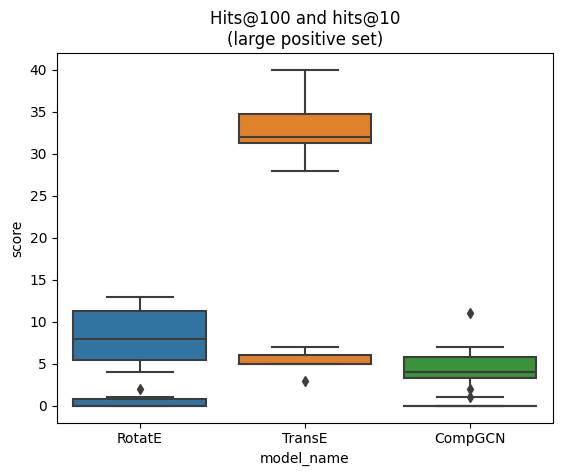

In [21]:
import seaborn as sns

sns.boxplot(score_dfs[0], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set)"
)
sns.boxplot(score_dfs[0], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

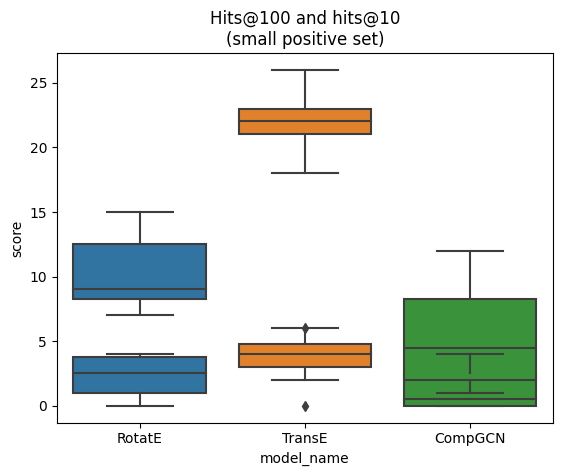

In [22]:
import seaborn as sns

sns.boxplot(score_dfs[1], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(small positive set)"
)
sns.boxplot(score_dfs[1], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

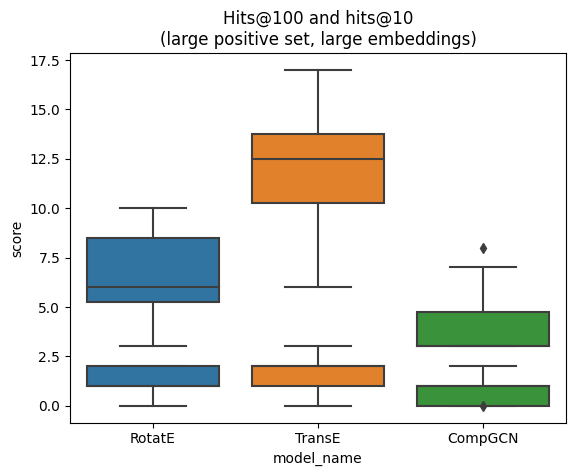

In [24]:
import seaborn as sns

sns.boxplot(score_dfs[2], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, large embeddings)"
)
sns.boxplot(score_dfs[2], x="model_name", y="score100_test").set_ylabel("score")

Text(0, 0.5, 'score')

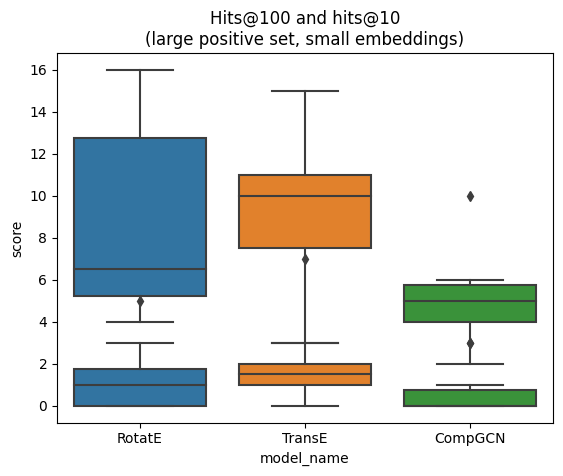

In [25]:
import seaborn as sns

sns.boxplot(score_dfs[3], x="model_name", y="score10_test").set(
    title="Hits@100 and hits@10\n(large positive set, small embeddings)"
)
sns.boxplot(score_dfs[3], x="model_name", y="score100_test").set_ylabel("score")

In [26]:
score_dfs = []
for output_dir in output_dirs:
    score_dfs.append(pd.read_csv(output_dir / "score_df.csv", index_col=0))
plot_dfs = []
for ds, score_df in zip(
    ("large", "small", "large_embeddings", "large_embeddings_small"), score_dfs
):
    plot_df = score_df[["model_name", "score10_test", "score100_test"]].copy()
    plot_df.columns = ["model_name", "hits@10", "hits@100"]
    plot_df["dataset"] = ds
    plot_dfs.append(plot_df)

plot_df = pd.concat(plot_dfs)
plot_df = plot_df.melt(id_vars=["model_name", "dataset"])
plot_dfs = {k: v for k, v in plot_df.groupby("model_name")}

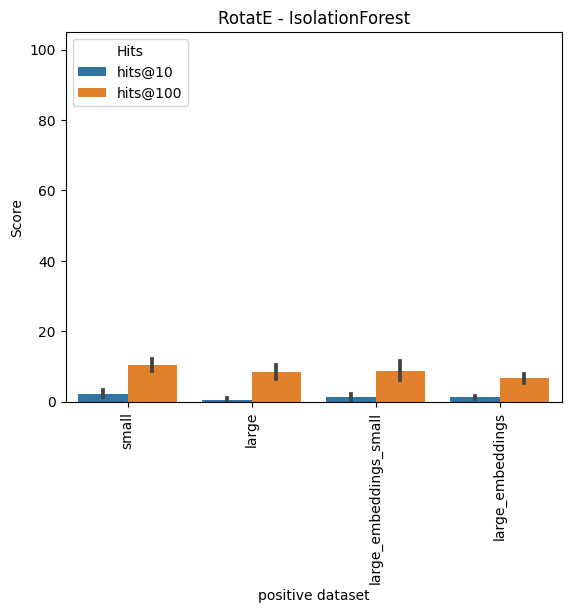

In [27]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "RotatE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

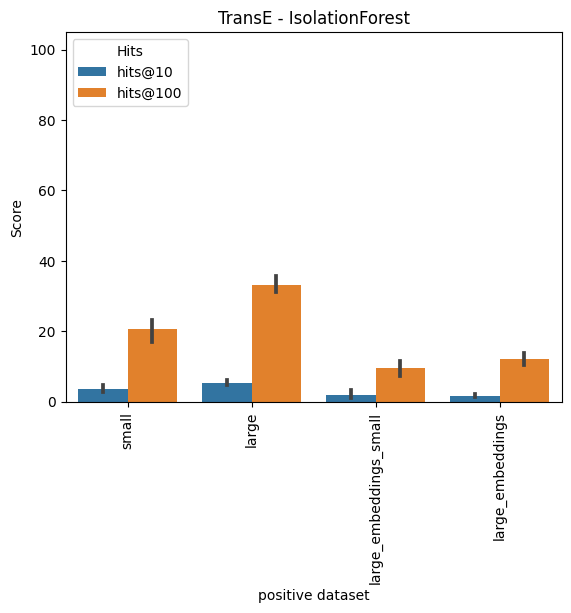

In [28]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "TransE"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

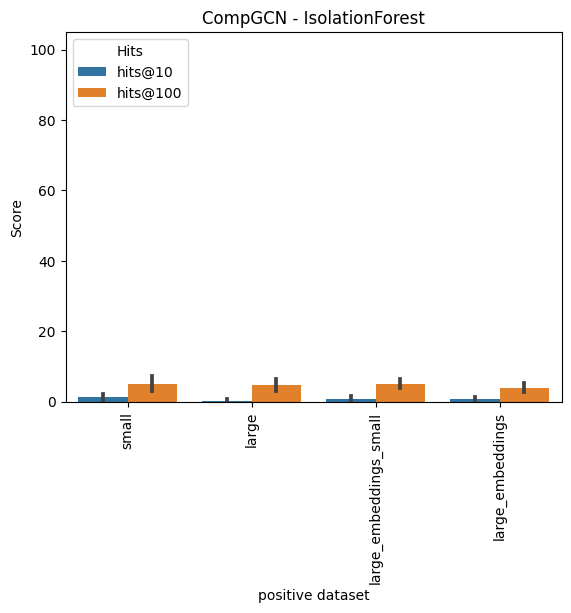

In [29]:
y_lim = (0, 105)
y_label = "Score"

import seaborn as sns
import matplotlib.pyplot as plt

model_name = "CompGCN"
plot_df = plot_dfs[model_name]

plot_df["Hits"] = plot_df["variable"]
plot = sns.barplot(
    plot_df,
    x="dataset",
    y="value",
    hue="Hits",
    order=["small", "large", "large_embeddings_small", "large_embeddings"],
)
sns.move_legend(plot, "upper left")
plot.set(xlabel="positive dataset", ylabel=y_label)
plot.set_title(f"{model_name} - {method}")
plot.set_ylim(y_lim)
_ = plot.set_xticklabels(
    labels=["small", "large", "large_embeddings_small", "large_embeddings"], rotation=90
)

In [30]:
proba_dfs = [
    build_proba_df_obl(
        gs, i, mns=MODEL_NAMES, gene_df_file="../topological_features/data/gene_df.csv"
    )
    for gs, i in zip(grid_searches_list, input_dirs)
]
for output_dir, proba_df in zip(output_dirs, proba_dfs):
    proba_df.to_csv(output_dir / "proba_df.csv")

In [31]:
proba_df = proba_dfs[0]
proba_df.query("test").sort_values("RotatE_0", ascending=False)

,node_id,gene_name,irr,train,val,test,RotatE_0,RotatE_1,RotatE_2,RotatE_3,...,CompGCN_0,CompGCN_1,CompGCN_2,CompGCN_3,CompGCN_4,CompGCN_5,CompGCN_6,CompGCN_7,CompGCN_8,CompGCN_9
75319,NCBIGENE:23303,KIF13B,False,False,False,True,0.040766,0.010265,0.020731,0.035030,...,-0.050470,0.004150,-0.037165,-0.038196,0.001200,0.008511,-0.041377,0.032259,-0.002958,-0.041140
75005,NCBIGENE:22933,SIRT2,False,False,False,True,0.040150,0.040615,0.048327,0.035089,...,0.000313,-0.026131,0.000267,-0.082235,-0.061983,0.009413,-0.007892,-0.102196,0.014509,-0.053230
80848,NCBIGENE:51330,TNFRSF12A,False,False,False,True,0.037066,0.041884,0.041290,0.040157,...,-0.010664,-0.009084,0.001423,-0.019352,-0.007486,0.005740,0.019436,-0.004317,0.002963,-0.023090
85804,NCBIGENE:7704,ZBTB16,False,False,False,True,0.036905,0.031193,0.040448,0.038406,...,0.045465,-0.052392,0.017476,0.009303,-0.000199,0.013629,0.018368,0.031066,-0.001688,0.023127
85900,NCBIGENE:7862,BRPF1,False,False,False,True,0.036687,0.013282,0.041903,-0.020166,...,0.031496,-0.006768,-0.006369,-0.000855,-0.041922,-0.002837,0.011398,0.050562,0.009043,-0.011518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76472,NCBIGENE:26735,OR1L3,False,False,False,True,-0.259770,-0.144209,-0.224831,-0.223143,...,-0.010662,-0.001195,-0.066261,-0.039268,-0.003902,-0.034002,0.023797,-0.147595,0.005460,-0.074599
72833,NCBIGENE:138803,OR13C3,False,False,False,True,-0.264838,-0.174755,-0.176354,-0.221914,...,-0.044323,0.009826,-0.151015,-0.032272,-0.087872,-0.027064,0.003920,-0.072478,0.014045,-0.024415
72662,NCBIGENE:132989,C4orf36,False,False,False,True,-0.264925,-0.157303,-0.154277,-0.146092,...,0.036887,-0.013495,0.023053,0.001861,-0.033780,0.037161,-0.024249,-0.035091,-0.000649,-0.101799
77219,NCBIGENE:28755,TRAC,False,False,False,True,-0.266448,-0.180264,-0.144618,-0.216489,...,-0.013972,-0.045465,-0.016087,0.012611,-0.023254,-0.011563,-0.005685,-0.019084,0.017216,-0.002508


In [32]:
for proba_df, score_df, od in zip(proba_dfs, score_dfs, output_dirs):
    proba_df.to_csv(od / "proba_df.csv")
    proba_df.query("test").to_csv(od / "proba_df_test.csv")
    score_df.to_csv(od / "score_df.csv")

    for mn in MODEL_NAMES:
        score_cols = [c for c in proba_df.columns if c.startswith(f"{mn}_")]
        tmp_df = proba_df[
            ["node_id", "gene_name", "irr", "train", "val", "test", *score_cols]
        ]
        tmp_df.to_csv(od / f"proba_df_{mn}.csv")
        tmp_df_test = tmp_df.query("test")
        tmp_df_test.to_csv(od / f"proba_df_test_{mn}.csv")

        genes_100 = build_ranked_lists(tmp_df, prefix=mn)
        genes_100.to_csv(od / f"genes_100_{mn}.csv", index=False)
        genes_100_test = build_ranked_lists(tmp_df_test, prefix=mn)
        genes_100_test.to_csv(od / f"genes_100_test_{mn}.csv", index=False)

        ds = "test"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{ds}_{mn}.csv", index_label="score")

        ds = "all"
        score_df_tmp = score_df.query("model_name == @mn")
        score_df_tmp = pd.concat(
            [score_df_tmp["m_name"], score_df_tmp.filter(regex=f".*_{ds}", axis=1)],
            axis=1,
        ).set_index("m_name")
        score_df_tmp.columns = [
            c.replace(f"_{ds}", "").replace("score", "hits@")
            for c in score_df_tmp.columns
        ]
        score_df_tmp = score_df_tmp.T
        score_df_tmp["mean"] = score_df_tmp.mean(axis=1)
        score_df_tmp.to_csv(od / f"scores_{mn}.csv", index_label="score")

In [2]:
s3_prefix = "s3://ENTER AWS S3 PREFIX/Result_lists"
for model_name in MODEL_NAMES:
    method_name = f"{remote_method}_{model_name}"

    graph = "OBL"
    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/standard/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/standard/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/standard/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    # Embeddings based on large DS
    graph = "enrichedOBL"

    ts = "LargeTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

    ts = "SmallTS"
    subset = "WholeSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv
    subset = "TestSet"
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/proba_df_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/all_results.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/genes_100_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/gene_100.csv
    !aws s3 cp './2_outputs/large_small_DS/{local_method}/scores_test_{model_name}.csv' {s3_prefix}/{graph}/{ts}/{method_name}/{subset}/scores.csv

upload: 2_outputs/standard/IsolationForest/proba_df_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/IsolationForest_RotatE/WholeSet/all_results.csv
upload: 2_outputs/standard/IsolationForest/genes_100_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/IsolationForest_RotatE/WholeSet/gene_100.csv
upload: 2_outputs/standard/IsolationForest/scores_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/IsolationForest_RotatE/WholeSet/scores.csv
upload: 2_outputs/standard/IsolationForest/proba_df_test_RotatE.csv to s3://nnedl-core-prd-eu-central-1-curated/compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/OBL/LargeTS/IsolationForest_RotatE/TestSet/all_results.csv
upload: 2_outputs/standard/IsolationForest/genes_100_test_RotatE.csv to s

In [34]:
!aws s3 ls --recursive {s3_prefix}

2023-07-07 16:05:55       6416 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/TestSet/gene_100.csv
2023-07-07 16:05:55       6399 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/CompGCN/WholeSet/gene_100.csv
2023-07-07 12:28:03     906682 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/all_results.csv
2023-07-07 12:28:05       6398 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/gene_100.csv
2023-07-07 12:28:05       1022 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/TestSet/scores.csv
2023-07-07 12:28:00    4548866 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Hetionet/LargeTS/Elkanoto_CompGCN/WholeSet/all_results.csv
2023-07-07 12:28:02       6248 compbiosandbox/Projects/NNRCO_KG/Sprint_3_3_IR_Paper/Result_lists/Het